In [1]:
import requests
import time
import numpy as np
import pandas as pd
from tqdm import tqdm

In [2]:
np.random.seed(2020)

In [ ]:
listOfTexts = list()
listOfGrades = list()
listOfComments = list()
listOfTimes = list()
from bs4 import BeautifulSoup
for i in tqdm(range(1495)):
    page = requests.get("https://www.banki.ru/services/responses/bank/alfabank/?page={page}&isMobile=0".format(page=i))
    
    soup = BeautifulSoup(page.content, 'html.parser')

    responses = soup.find_all(class_='responses__item')
    for child in responses:
        grade = child.find(itemprop='ratingValue')
        if grade:
            grade = grade.text
        text = child.find(class_='responses__item__message markup-inside-small markup-inside-small--bullet')
        if text:
            text = text.text
        info = child.find('time')
        if info:
            info = info.text
        numOfComments = child.find(class_='responses__item__comment-count')
        if numOfComments:
            numOfComments = int(numOfComments.text)
        else:
            numOfComments = 0

        # print(text)
        # print(grade)
        # print(info)
        # print(numOfComments)
        # print('\n\n')
        listOfTexts.append(text)
        listOfTimes.append(info)
        listOfComments.append(numOfComments)
        listOfGrades.append(grade)
    time.sleep(0.1 + 0.1 * max(-1, np.random.randn()))
df = pd.DataFrame(list(zip(listOfTexts,listOfGrades,listOfComments,listOfTimes)), columns =['Text', 'Grade', 'numOfComments', 'Time'])
df.to_csv('result.csv')

In [5]:
data = pd.read_csv('result.csv')
data.head(10)

,Unnamed: 0,Text,Grade,numOfComments,Time
0,0,\n\t\t\t\t\t\t\tИзменили дату платежа по креди...,\n\t\t\t1\n\t\t,1,28.03.2020 15:20
1,1,\n\t\t\t\t\t\t\tЕще не так давно Альфа-банком ...,\n\t\t\t1\n\t\t,1,28.03.2020 14:33
2,2,\n\t\t\t\t\t\t\tУважаемый Альфа Банк! Снова ра...,\n\t\t\t1\n\t\t,0,28.03.2020 11:39
3,3,\n\t\t\t\t\t\t\tВообщем по рекомендации знаком...,\n\t\t\t1\n\t\t,0,28.03.2020 10:36
4,4,\n\t\t\t\t\t\t\tХочу поделиться соим опытом.У ...,\n\t\t\t1\n\t\t,0,28.03.2020 9:43
5,5,NaN,\n\t\t\t1\n\t\t,0,NaN
6,6,"\n\t\t\t\t\t\t\tПохвастаюсь!Да, я получил мину...",\n\t\t\t1\n\t\t,0,28.03.2020 1:09
7,7,\n\t\t\t\t\t\t\tЯ являюсь клиентом Альфа-Банка...,\n\t\t\t1\n\t\t,0,27.03.2020 23:26
8,8,\n\t\t\t\t\t\t\tВ рамках декларационной кампан...,\n\t\t\t1\n\t\t,0,27.03.2020 22:58
9,9,\n\t\t\t\t\t\t\tАльфа банк. Вы реально молодцы...,\n\t\t\t1\n\t\t,1,27.03.2020 21:43


In [6]:
import re
#Preprocess function
def preprocess_text(text):
    text = str(text)
    text = text.lower()
    text = re.sub(r'[,.!;?:)(]', ' ', text)
    text = ''.join(re.findall(r'[А-я0-9 ,;!.]+', text))
    return text

In [7]:
tqdm.pandas()
data['Text'] = data['Text'].progress_apply(lambda x : preprocess_text(x))
data['Grade'] = data['Grade'].progress_apply(lambda x : str(x).strip())
data.head()

100%|██████████| 37350/37350 [00:00<00:00, 506550.26it/s]


,Unnamed: 0,Text,Grade,numOfComments,Time
0,0,изменили дату платежа по кредиту сместив на 0...,1,1,28.03.2020 15:20
1,1,еще не так давно альфабанком начали пользовать...,1,1,28.03.2020 14:33
2,2,уважаемый альфа банк снова разочаровывает ваша...,1,0,28.03.2020 11:39
3,3,вообщем по рекомендации знакомого подал заявку...,1,0,28.03.2020 10:36
4,4,хочу поделиться соим опытом у меня было и есть...,1,0,28.03.2020 9:43


In [8]:
data.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
def grade_process(grade):
    if grade=='Без оценки':
        return -1
    try:
        grade = int(grade)
        if grade > 3:
            return 1
        else:
            return 0
    except:
        return -1
data['Grade'] = data['Grade'].progress_apply(grade_process)
data.head(20)

100%|██████████| 37350/37350 [00:00<00:00, 415995.51it/s]


,Text,Grade,numOfComments,Time
0,изменили дату платежа по кредиту сместив на 0...,0,1,28.03.2020 15:20
1,еще не так давно альфабанком начали пользовать...,0,1,28.03.2020 14:33
2,уважаемый альфа банк снова разочаровывает ваша...,0,0,28.03.2020 11:39
3,вообщем по рекомендации знакомого подал заявку...,0,0,28.03.2020 10:36
4,хочу поделиться соим опытом у меня было и есть...,0,0,28.03.2020 9:43
5,,0,0,NaN
6,похвастаюсь да я получил минус 100 с лишним б...,0,0,28.03.2020 1:09
7,я являюсь клиентом альфабанка уже много лет и ...,0,0,27.03.2020 23:26
8,в рамках декларационной кампании я обратилась ...,0,0,27.03.2020 22:58
9,альфа банк вы реально молодцы исполняете ука...,0,1,27.03.2020 21:43


In [10]:
data = data[data['Text'].str.len() > 1]
data = data[data['Grade'] != -1]
data.head(20)

,Text,Grade,numOfComments,Time
0,изменили дату платежа по кредиту сместив на 0...,0,1,28.03.2020 15:20
1,еще не так давно альфабанком начали пользовать...,0,1,28.03.2020 14:33
2,уважаемый альфа банк снова разочаровывает ваша...,0,0,28.03.2020 11:39
3,вообщем по рекомендации знакомого подал заявку...,0,0,28.03.2020 10:36
4,хочу поделиться соим опытом у меня было и есть...,0,0,28.03.2020 9:43
6,похвастаюсь да я получил минус 100 с лишним б...,0,0,28.03.2020 1:09
7,я являюсь клиентом альфабанка уже много лет и ...,0,0,27.03.2020 23:26
8,в рамках декларационной кампании я обратилась ...,0,0,27.03.2020 22:58
9,альфа банк вы реально молодцы исполняете ука...,0,1,27.03.2020 21:43
10,решил взять потребительский кредит другие бан...,0,0,27.03.2020 21:28


In [11]:
len(data[data['Grade']==1])/len(data), len(data[data['Grade']==0])/len(data)

(0.2881901203819012, 0.7118098796180988)

In [12]:
sentences = list(data['Text'])
sentences[0]

'изменили дату платежа по кредиту  сместив на 06 04 2020 соответственно пересчитали сумму процентов и погашения основного долга  при обращении в онлайн чат была получена стандартная отписка о выходных днях по указу 206 от 25 3 2020 и ссылкой на договор  альфабанк  в чем была сложность автоматически списать сумму в дату платежа  пошли по простому пути с выгодой для себя  ну и на по следок  прошу вернуть суммы списания процентов и основного долга в соответствии со старым графиком '

# MODEL 1

In [13]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [14]:

vectorizer = CountVectorizer()

scoring = {'F1_score': make_scorer(f1_score), 'Accuracy': make_scorer(accuracy_score)}
parameters = {
    "learning_rate": [0.1, 0.25],
    "min_samples_split": [2, 4],
    "min_samples_leaf": [2, 4],
    "max_depth":[3, 5],
    "max_features":["sqrt", None],
    "subsample":[0.5, 1.0],
    "n_estimators":[10, 100]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, scoring=scoring, verbose=1,refit='F1_score', cv=5, n_jobs=-1)

In [15]:
y = data['Grade'].values
sentences_train, sentences_test, y_train, y_test = train_test_split(sentences, y, test_size=0.2)


In [16]:
vectorizer = CountVectorizer()
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train)
X_test  = vectorizer.transform(sentences_test)

In [ ]:



clf.fit(X_train, y_train)



In [18]:
clf.best_params_

{'learning_rate': 0.25,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [19]:
print("ACCURACY : ", accuracy_score(y_train, clf.predict(X_train)))

ACCURACY :  0.9667877529839128


In [20]:
print("ACCURACY : ", accuracy_score(y_test, clf.predict(X_test)))

ACCURACY :  0.9512448132780082


In [21]:
print("F1_SCORE: ", f1_score(y_train, clf.predict(X_train)))

F1_SCORE:  0.9394226218646475


In [22]:
print("F1_SCORE: ", f1_score(y_test, clf.predict(X_test)))

F1_SCORE:  0.9090909090909092


### Переобучается, уменьшим глубину

In [23]:
parameters = {
    "learning_rate": [0.1, 0.25],
    "min_samples_split": [2, 4],
    "min_samples_leaf": [2, 4],
    "max_depth":[3],
    "max_features":["sqrt", None],
    "subsample":[0.5, 1.0],
    "n_estimators":[10, 100]
    }

clf = GridSearchCV(GradientBoostingClassifier(), parameters, scoring=scoring, verbose=1,refit='F1_score', cv=5, n_jobs=-1)

In [24]:
y = data['Grade'].values
clf.fit(X_train, y_train)


Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 320 out of 320 | elapsed:  7.2min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no...
             iid='warn', n_jobs=-1,
             param_grid={'learni

In [25]:
clf.best_params_

{'learning_rate': 0.25,
 'max_depth': 3,
 'max_features': None,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100,
 'subsample': 1.0}

In [26]:
print("ACCURACY : ", accuracy_score(y_train, clf.predict(X_train)))

ACCURACY :  0.9743124026984951


In [27]:
print("ACCURACY : ", accuracy_score(y_test, clf.predict(X_test)))

ACCURACY :  0.9470954356846473


In [28]:
print("F1_SCORE: ", f1_score(y_train, clf.predict(X_train)))

F1_SCORE:  0.954124189063948


In [29]:
print("F1_SCORE: ", f1_score(y_test, clf.predict(X_test)))

F1_SCORE:  0.9022988505747126


### Эта модель с лучшим F1_score среди всех с макс глубиной 3, но она переобучилась еще сильнее. Возьмем первую модель

In [18]:
gbc = GradientBoostingClassifier(learning_rate=0.25,
 max_depth=5,
 max_features='sqrt',
 min_samples_leaf=4,
 min_samples_split=2,
 n_estimators=100,
 subsample= 1.0)
gbc.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.25, loss='deviance', max_depth=5,
                           max_features='sqrt', max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=4, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [19]:
from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test, gbc.predict_proba(X_test)[:, 1])

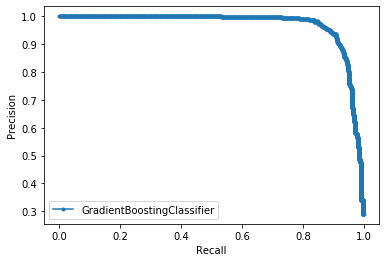

In [20]:
%matplotlib inline
plt.plot(recall, precision, marker='.', label='GradientBoostingClassifier')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

100%|██████████| 1908/1908 [00:19<00:00, 96.55it/s]


BEST THRESHOLD WITH RESPECT TO F1_LOSS:  0.3243255021248853
BEST F1_SCORE:  0.9223744292237445


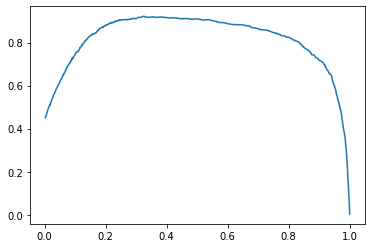

In [21]:
import matplotlib.pyplot as plt

f1scores = list()
def roundthreshold(x, th):
    return (x[1] >= th)
for th in tqdm(thresholds, total=len(thresholds)):
    f1scores.append(f1_score(y_test, [roundthreshold(x, th) for x in gbc.predict_proba(X_test)]))
plt.plot(thresholds, f1scores)
print("BEST THRESHOLD WITH RESPECT TO F1_LOSS: ", thresholds[np.argmax(f1scores)])
print("BEST F1_SCORE: ", np.max(f1scores))

# MODEL 2

In [22]:
from keras.layers import *
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
# The maximum number of words to be used. (most frequent)
MAX_NB_WORDS = 50000
# Max number of words in each complaint.
MAX_SEQUENCE_LENGTH = 250
# This is fixed.
EMBEDDING_DIM = 100
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(sentences)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

Found 72379 unique tokens.


In [23]:
X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)
X_train = pad_sequences(X_train, maxlen=MAX_SEQUENCE_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', X_train.shape, X_test.shape)

Shape of data tensor: (7708, 250) (1928, 250)


In [24]:
Y_train = y_train
Y_test = y_test

In [25]:
# X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(7708, 250) (7708,)
(1928, 250) (1928,)


#### Обучим на нескольких LR. Число эпох определим путем EarlyStopping

In [43]:
from keras.models import Sequential, Model
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
# GlobalMaxPooling1D
models = list()
for lr in [0.0003, 0.005, 0.01, None]:
#     earlyStopping = EarlyStopping(monitor='val_loss', patience=2, verbose=0, mode='min')
#     model = Sequential()
#     model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1]))
#     model.add(SpatialDropout1D(0.2))
#     model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True))
#     model.add(TimeDistributed(Dense(1)))
#     first = model.add(GlobalMaxPooling1D())
#     second = model.add(AveragePooling1D())
#     merged = Concatenate([first, second])
#     model = merged
#     model.add(Flatten())
#     model.add(Dense(1, activation='sigmoid'))
    inp = Input(shape=(X_train.shape[1],))
    x = Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=X_train.shape[1])(inp)
    x = SpatialDropout1D(0.2)(x)
    x = LSTM(100, dropout=0.2, recurrent_dropout=0.2, return_sequences=True)(x)
    x_1 = GlobalMaxPooling1D()(x)
    x_2 = GlobalAveragePooling1D()(x)
    x = concatenate([x_1, x_2])
#     x = Flatten()(x)
    x = Dense(1, activation='sigmoid')(x)
    optimizer = Adam()
    if lr:
        optimizer = Adam(learning_rate=lr)
    model = Model(inputs=[inp], outputs=x)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])

    epochs = 10
    batch_size = 64

    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2, callbacks=[earlyStopping])
    models.append((model, history))

Train on 6166 samples, validate on 1542 samples
Epoch 1/10
6166/6166 [==============================] - 27s 4ms/step - loss: 0.5639 - accuracy: 0.7368 - val_loss: 0.4172 - val_accuracy: 0.8463
Epoch 2/10
6166/6166 [==============================] - 27s 4ms/step - loss: 0.3358 - accuracy: 0.8951 - val_loss: 0.2992 - val_accuracy: 0.9189
Epoch 3/10
6166/6166 [==============================] - 27s 4ms/step - loss: 0.2396 - accuracy: 0.9382 - val_loss: 0.2619 - val_accuracy: 0.9280
Epoch 4/10
6166/6166 [==============================] - 27s 4ms/step - loss: 0.1818 - accuracy: 0.9590 - val_loss: 0.2284 - val_accuracy: 0.9287
Epoch 5/10
6166/6166 [==============================] - 27s 4ms/step - loss: 0.1389 - accuracy: 0.9695 - val_loss: 0.1973 - val_accuracy: 0.9403
Epoch 6/10
6166/6166 [==============================] - 27s 4ms/step - loss: 0.0952 - accuracy: 0.9794 - val_loss: 0.2169 - val_accuracy: 0.9416
Epoch 7/10
6166/6166 [==============================] - 27s 4ms/step - loss: 0.068

### Видно, что модель №3 обучаются до ~0.96 на валидационном датасете, но практически запоминает треин датасет. Но так как val_accuracy все равно растет, то я думаю это ок. lr=0.01

https://stats.stackexchange.com/questions/355997/when-to-stop-training-of-neural-network-when-validation-loss-is-still-decreasing

https://www.reddit.com/r/MachineLearning/comments/700wpi/overfitting_neural_network_yielding_better_test/

In [44]:
model = models[2][0]
from sklearn.metrics import f1_score, accuracy_score
print("ACCURACY: ", accuracy_score(Y_test, model.predict(X_test).round()))
print("F1 SCORE: ", f1_score(Y_test, model.predict(X_test).round()))

ACCURACY:  0.9678423236514523
F1 SCORE:  0.9417293233082707


In [46]:
from sklearn.metrics import precision_recall_curve
# from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt
precision, recall, thresholds = precision_recall_curve(y_test, model.predict(X_test))

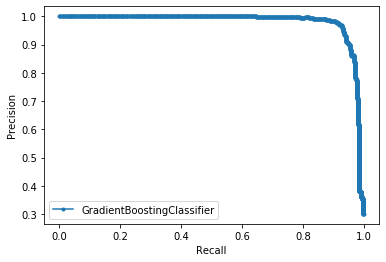

In [47]:
%matplotlib inline
plt.plot(recall, precision, marker='.', label='GradientBoostingClassifier')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [ ]:
f1scores = list()
thresholds = np.linspace(0.2, 0.8, 100)
def roundthreshold(x, th):
    return (x[0] >= th)
for th in tqdm(thresholds, total=100):
    f1scores.append(f1_score(y_test, [roundthreshold(x, th) for x in model.predict(X_test)]))



100%|██████████| 1701/1701 [00:04<00:00, 378.15it/s]


BEST THRESHOLD WITH RESPECT TO F1_LOSS:  0.23597708
BEST F1_SCORE:  0.9475620975160994


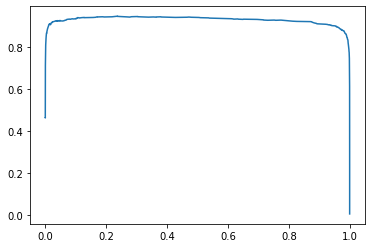

In [49]:
import matplotlib.pyplot as plt

f1scores = list()
y_pred = model.predict(X_test)
for th in tqdm(thresholds, total=len(thresholds)):
    f1scores.append(f1_score(y_test, [(x[0] >= th) for x in y_pred]))
plt.plot(thresholds, f1scores)
print("BEST THRESHOLD WITH RESPECT TO F1_LOSS: ", thresholds[np.argmax(f1scores)])
print("BEST F1_SCORE: ", np.max(f1scores))

#### Нет сильной разницы от threshold=0.5. Вторая модель дает лучший F1-score на тест выборке (0.947>0.922)

In [31]:
def predict_class(sentence):
    sentences = [sentence]
    temp = tokenizer.texts_to_sequences(sentences)
    temp = pad_sequences(temp, maxlen=MAX_SEQUENCE_LENGTH)
    return model.predict(temp).round()[0][0]

In [32]:
predict_class('заказал дебетовку по инету  пришла смс что могу получить  прихожу в банк  тут сидит особь  лицо мега злобное  начинает какуюто ересь спрашивать  зачем вам карта  кто на нее будет делать переводы  на что будете их тратить и в каких магазинах еле сдержался чтоб не послать  ответил  в оконцовке  хотя ваша карта именная     уже готова и лежит тут  в офисе  но служба безопасности не может одобрить ее выдачупонятно что ужесточают  но такое прескверное отношение к клиенту  это просто    переплюнули худшие традиции совка  и это типа крупнейший частный банк рф  очень рад  что не стал их клиентом и в оконцовке пожелал им идти в известном направлении ')

0.0

In [33]:
predict_class('в продолжение первого отзыва  хочу поблагодарить команду альфа банка и менеджера ирину глонину  за решение моего вопроса  и открытие расчетного счета  остается не ясным момент тарифного плана специальный выбор и возможность перехода на другой тариф  только через полгода  но и на том спасибо  желаю успехов в работе ')

1.0